In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/heart_statlog_cleveland_hungary_final.csv")

EDA

In [ ]:
data

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [ ]:
data.shape

(1190, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [ ]:
data.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


In [ ]:
data['target'].value_counts()

,count
target,
1,629
0,561


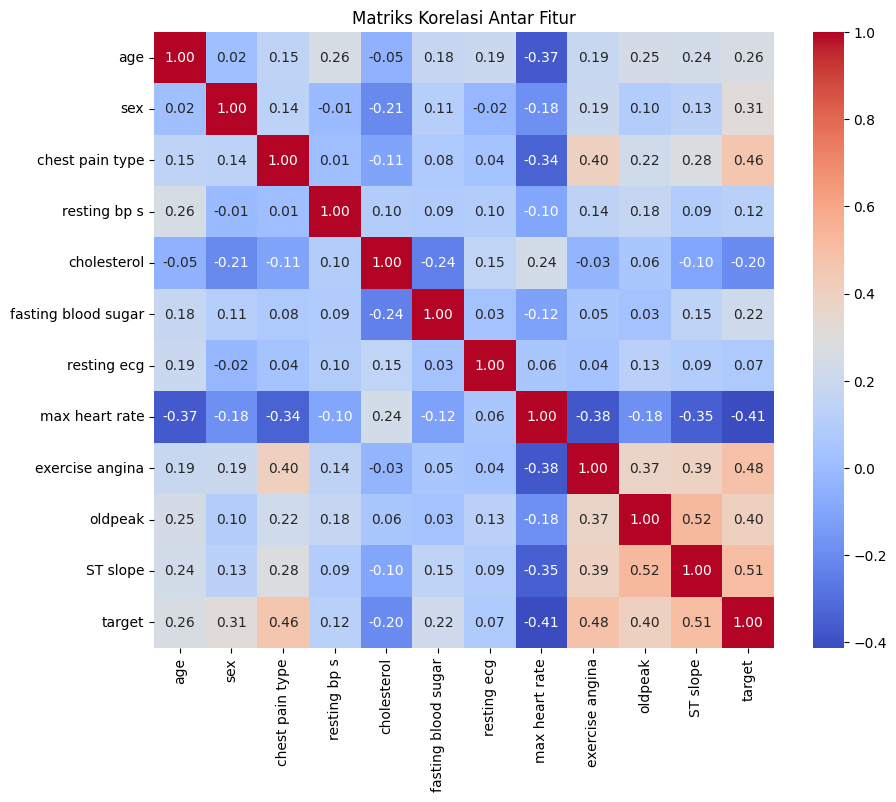

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung korelasi antara fitur
corr_matrix = data.corr()

# Menampilkan heatmap matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi Antar Fitur")
plt.show()

Fitur Selection

In [ ]:
# Menentukan data X dan y

X = data.drop("target", axis=1)
y = data["target"]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung korelasi antara setiap fitur dan target
correlation = X.corrwith(y)
print(correlation)

age                    0.262029
sex                    0.311267
chest pain type        0.460127
resting bp s           0.121415
cholesterol           -0.198366
fasting blood sugar    0.216695
resting ecg            0.073059
max heart rate        -0.413278
exercise angina        0.481467
oldpeak                0.398385
ST slope               0.505608
dtype: float64


In [ ]:
relevant_features = correlation[(correlation > 0.1) | (correlation < -0.1)]
print(relevant_features)

age                    0.262029
sex                    0.311267
chest pain type        0.460127
resting bp s           0.121415
cholesterol           -0.198366
fasting blood sugar    0.216695
max heart rate        -0.413278
exercise angina        0.481467
oldpeak                0.398385
ST slope               0.505608
dtype: float64


In [ ]:
X = X[relevant_features.index]

In [ ]:
X

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,ST slope
0,40,1,2,140,289,0,172,0,0.0,1
1,49,0,3,160,180,0,156,0,1.0,2
2,37,1,2,130,283,0,98,0,0.0,1
3,48,0,4,138,214,0,108,1,1.5,2
4,54,1,3,150,195,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,132,0,1.2,2
1186,68,1,4,144,193,1,141,0,3.4,2
1187,57,1,4,130,131,0,115,1,1.2,2
1188,57,0,2,130,236,0,174,0,0.0,2


In [ ]:
y

,target
0,0
1,1
2,0
3,1
4,0
...,...
1185,1
1186,1
1187,1
1188,1


In [ ]:
y.value_counts()

,count
target,
1,629
0,561


Pre processing

In [ ]:
# Normalisasi data
from sklearn.preprocessing import MinMaxScaler

X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns = X.columns)
X

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,ST slope
0,0.244898,1.0,0.333333,0.70,0.479270,0.0,0.788732,0.0,0.295455,0.333333
1,0.428571,0.0,0.666667,0.80,0.298507,0.0,0.676056,0.0,0.409091,0.666667
2,0.183673,1.0,0.333333,0.65,0.469320,0.0,0.267606,0.0,0.295455,0.333333
3,0.408163,0.0,1.000000,0.69,0.354892,0.0,0.338028,1.0,0.465909,0.666667
4,0.530612,1.0,0.666667,0.75,0.323383,0.0,0.436620,0.0,0.295455,0.333333
...,...,...,...,...,...,...,...,...,...,...
1185,0.346939,1.0,0.000000,0.55,0.437811,0.0,0.507042,0.0,0.431818,0.666667
1186,0.816327,1.0,1.000000,0.72,0.320066,1.0,0.570423,0.0,0.681818,0.666667
1187,0.591837,1.0,1.000000,0.65,0.217247,0.0,0.387324,1.0,0.431818,0.666667
1188,0.591837,0.0,0.333333,0.65,0.391376,0.0,0.802817,0.0,0.295455,0.666667


In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Ukuran Data Latih: {X_train.shape}, Ukuran Data Uji: {X_test.shape}")

Ukuran Data Latih: (952, 10), Ukuran Data Uji: (238, 10)


In [ ]:
print(X_train)

           age  sex  chest pain type  resting bp s  cholesterol  \
1005  0.714286  1.0         1.000000         0.650     0.547264   
224   0.102041  1.0         0.666667         0.600     0.494196   
798   0.571429  0.0         1.000000         0.670     0.678275   
816   1.000000  1.0         1.000000         0.625     0.504146   
427   0.571429  1.0         0.333333         0.630     0.275290   
...        ...  ...              ...           ...          ...   
1044  0.612245  1.0         1.000000         0.625     0.497512   
1095  0.551020  1.0         0.333333         0.650     0.434494   
1130  0.673469  1.0         0.000000         0.670     0.388060   
860   0.693878  0.0         1.000000         0.700     0.444444   
1126  0.285714  1.0         0.333333         0.600     0.489221   

      fasting blood sugar  max heart rate  exercise angina   oldpeak  ST slope  
1005                  1.0        0.507042              1.0  0.500000  0.333333  
224                   0.0        

In [ ]:
print(y_train)

1005    1
224     0
798     1
816     1
427     0
       ..
1044    1
1095    0
1130    1
860     1
1126    0
Name: target, Length: 952, dtype: int64


Modelling

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       107
           1       0.92      0.96      0.94       131

    accuracy                           0.93       238
   macro avg       0.94      0.93      0.93       238
weighted avg       0.93      0.93      0.93       238

Akurasi Model: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93


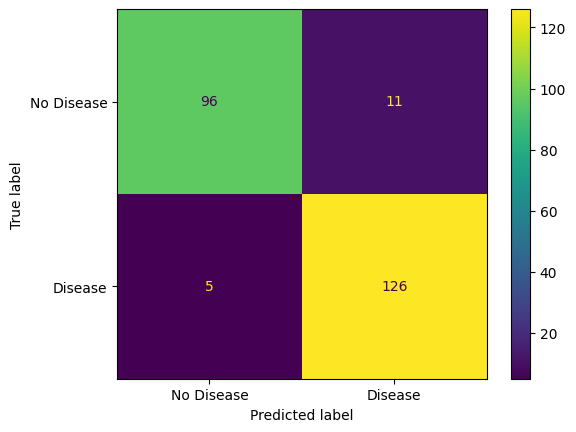

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Pengujian
y_pred = xgb_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1_score = f1_score(y_test, y_pred, average='weighted')

# Menampilkan classification report untuk evaluasi lebih lanjut
print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Tampilkan hasil evaluasi
print(f"Akurasi Model: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Disease'])
disp.plot()
plt.show()